In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Load the .npy file and extract the first frame

uint16


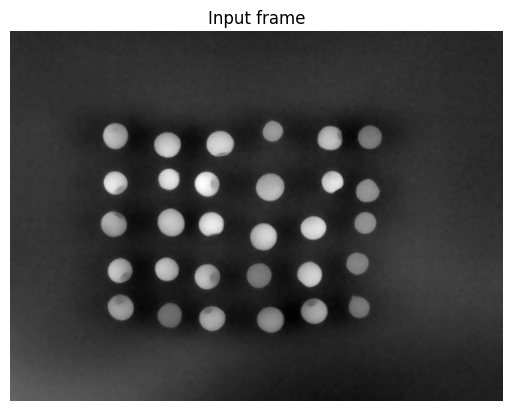

In [2]:
# bad good bad good bad good
data = np.load('./SavedData/thirtySeed01.npy', allow_pickle=True).astype(np.uint16)
print(data.dtype)
frame = data[500]
plt.imshow(frame, cmap='gray')
plt.title('Input frame')
plt.axis('off')
plt.show()

In [3]:
print('The shape of each frame of data is:',frame.shape)
print(frame)

The shape of each frame of data is: (480, 640)
[[8690 8690 8690 ... 8684 8681 8680]
 [8690 8691 8691 ... 8682 8681 8679]
 [8690 8688 8687 ... 8679 8681 8681]
 ...
 [8770 8769 8769 ... 8673 8675 8675]
 [8771 8770 8769 ... 8674 8675 8675]
 [8770 8769 8770 ... 8671 8673 8674]]


Preprocess the frame by applying Gaussian blur to reduce noise

uint16


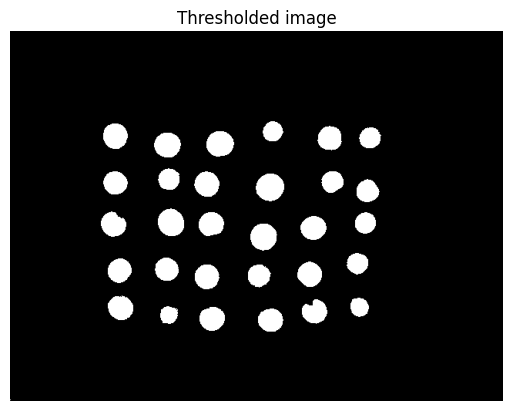

In [4]:
# Choose a threshold value that works well for your image, 8772 is by maual testing
threshold_value = 8770

# Threshold the image
ret, thresh = cv2.threshold(frame, threshold_value, 255, cv2.THRESH_BINARY)
print(thresh.dtype)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded image')
plt.axis('off')
plt.show()

In [5]:
thresh_copy = thresh
def expand_seed(image, x, y):
    seed_positions = []
    dx = [-1, 0, 1, 0]
    dy = [0, -1, 0, 1]

    image[x][y] = 0
    seed_positions.append([x, y])
    for k in range(4):
        new_x, new_y = x + dx[k], y + dy[k]
        if (new_x >= 0 and new_x < 480 and new_y >= 0 and new_y < 640 and image[new_x][new_y] == 255):
            seed_positions += expand_seed(image, new_x, new_y)

    return seed_positions

    


# Initialize the dictionary of seed coordinates
seed_coords = {}
count = 0

# Traverse through all the pixels in the image
for x in range(thresh_copy.shape[0]):
    for y in range(thresh_copy.shape[1]):
        if thresh_copy[x, y] == 255:
            seed_pixels = expand_seed(thresh_copy, x, y)
            if len(seed_pixels) > 20:
                count+=1
                seed_name = f'seed {count}'
                seed_coords[seed_name] = seed_pixels

            # Update thresh_copy to remove the expanded seed pixels
            for pixel in seed_pixels:
                thresh_copy[pixel[0], pixel[1]] = 0

for key in seed_coords:
    print(key, len(seed_coords[key]))

seed 1 534
seed 2 837
seed 3 780
seed 4 599
seed 5 936
seed 6 884
seed 7 615
seed 8 741
seed 9 832
seed 10 624
seed 11 1029
seed 12 669
seed 13 963
seed 14 791
seed 15 808
seed 16 594
seed 17 811
seed 18 949
seed 19 594
seed 20 728
seed 21 759
seed 22 803
seed 23 808
seed 24 670
seed 25 813
seed 26 467
seed 27 754
seed 28 418
seed 29 804
seed 30 778


In [73]:
# change the seeds mapping maually
temp_1 = seed_coords['seed 1']
temp_2 = seed_coords['seed 2']
temp_3 = seed_coords['seed 3']
temp_4 = seed_coords['seed 4']
temp_5 = seed_coords['seed 5']
temp_6 = seed_coords['seed 6']
temp_7 = seed_coords['seed 7']
temp_8 = seed_coords['seed 8']
temp_9 = seed_coords['seed 9']
temp_10 = seed_coords['seed 10']
temp_11 = seed_coords['seed 11']
temp_12 = seed_coords['seed 12']
temp_13 = seed_coords['seed 13']
temp_14 = seed_coords['seed 14']
temp_15 = seed_coords['seed 15']
temp_16 = seed_coords['seed 16']
temp_17 = seed_coords['seed 17']
temp_18 = seed_coords['seed 18']
temp_19 = seed_coords['seed 19']
temp_20 = seed_coords['seed 20']
temp_21 = seed_coords['seed 21']
temp_22 = seed_coords['seed 22']
temp_23 = seed_coords['seed 23']
temp_24 = seed_coords['seed 24']
temp_25 = seed_coords['seed 25']
temp_26 = seed_coords['seed 26']
temp_27 = seed_coords['seed 27']
temp_28 = seed_coords['seed 28']
temp_29 = seed_coords['seed 29']
temp_30 = seed_coords['seed 30']


seeds = {}
seeds['good seed 1'] = temp_6
seeds['good seed 2'] = temp_7
seeds['good seed 3'] = temp_13
seeds['good seed 4'] = temp_20
seeds['good seed 5'] = temp_28
seeds['good seed 6'] = temp_1
seeds['good seed 7'] = temp_11
seeds['good seed 8'] = temp_18
seeds['good seed 9'] = temp_24
seeds['good seed 10'] = temp_30
seeds['good seed 11'] = temp_4
seeds['good seed 12'] = temp_12
seeds['good seed 13'] = temp_16
seeds['good seed 14'] = temp_19
seeds['good seed 15'] = temp_26
seeds['bad seed 1'] = temp_2
seeds['bad seed 2'] = temp_8
seeds['bad seed 3'] = temp_14
seeds['bad seed 4'] = temp_21
seeds['bad seed 5'] = temp_25
seeds['bad seed 6'] = temp_5
seeds['bad seed 7'] = temp_9
seeds['bad seed 8'] = temp_15
seeds['bad seed 9'] = temp_23
seeds['bad seed 10'] = temp_29
seeds['bad seed 11'] = temp_3
seeds['bad seed 12'] = temp_10
seeds['bad seed 13'] = temp_17
seeds['bad seed 14'] = temp_22
seeds['bad seed 15'] = temp_27

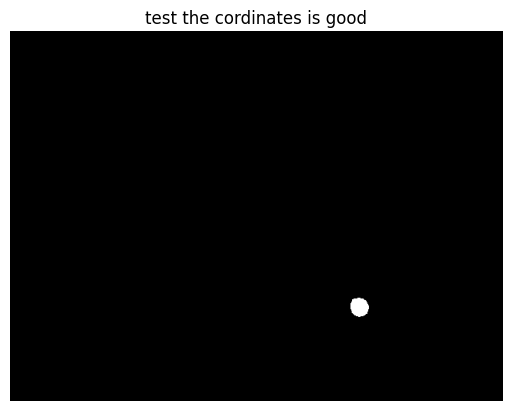

In [98]:
# test_plot = np.zeros((480, 640), dtype=np.uint8)
# ploted_val = 200
# for key in seeds:
#     if (key == 'good seed 15'):
#         for i in range (len(seeds[key])):
#             test_plot[seeds[key][i][0]][seeds[key][i][1]] = ploted_val

# plt.imshow(test_plot, cmap='gray')
# plt.title('test the cordinates is good')
# plt.axis('off')
# plt.show()

good seed 1
10
good seed 2
30
good seed 3
50
good seed 4
70
good seed 5
90
good seed 6
110
good seed 7
130
good seed 8
150
good seed 9
170
good seed 10
190
good seed 11
210
good seed 12
230
good seed 13
250
good seed 14
270
good seed 15
290
bad seed 1
310
bad seed 2
330
bad seed 3
350
bad seed 4
370
bad seed 5
390
bad seed 6
410
bad seed 7
430
bad seed 8
450
bad seed 9
470
bad seed 10
490
bad seed 11
510
bad seed 12
530
bad seed 13
550
bad seed 14
570
bad seed 15
590


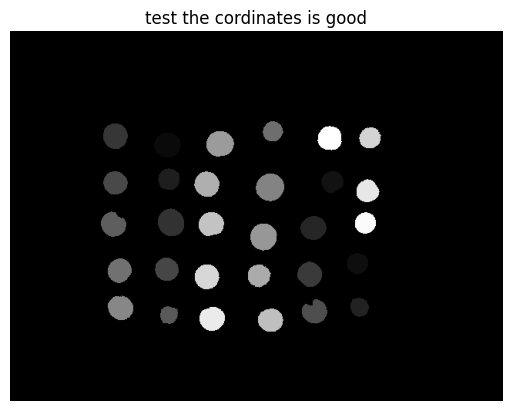

In [99]:
# test whether we are getting the correct map

test_plot = np.zeros((480, 640), dtype=np.uint8)
ploted_val = 10
for key in seeds:
    print(key)
    print(ploted_val)
    for i in range (len(seeds[key])):
        test_plot[seeds[key][i][0]][seeds[key][i][1]] = ploted_val
    ploted_val += 20

plt.imshow(test_plot, cmap='gray')
plt.title('test the cordinates is good')
plt.axis('off')
plt.show()

In [100]:
seed_curve_mean = {}
seed_curve_std = {}
for picture in data:
    for tag in seeds:
        tag_size = len(seeds[tag])
        tag_seed_vals = []
        for i in range(tag_size):
            x,y = seeds[tag][i][0], seeds[tag][i][1]
            tag_seed_vals.append(picture[x][y])
        tag_seed_val_mean = np.mean(tag_seed_vals)
        tag_seed_val_std = np.std(tag_seed_vals)
        seed_curve_mean.setdefault(tag, []).append(tag_seed_val_mean)
        seed_curve_std.setdefault(tag, []).append(tag_seed_val_std)

# print(seed_curve)
print(len(seed_curve_mean['good seed 2']))
print(len(seed_curve_std['good seed 2']))

# x = list(range(1, 901))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 15))

# for tag, values in seed_curve_mean.items():
#     ax1.plot(x, values, label=tag)
# for tag, values in seed_curve_std.items():
#     ax2.plot(x, values, label=tag)


# ax1.set_ylabel('Mean Temperature')
# ax2.set_ylabel('Standard Deviation')
# ax2.set_xlabel('Time')
# ax1.legend()
# ax2.legend()
# plt.show()

900
900


In [101]:
for key in seed_curve_mean:
    print(key)

good seed 1
good seed 2
good seed 3
good seed 4
good seed 5
good seed 6
good seed 7
good seed 8
good seed 9
good seed 10
good seed 11
good seed 12
good seed 13
good seed 14
good seed 15
bad seed 1
bad seed 2
bad seed 3
bad seed 4
bad seed 5
bad seed 6
bad seed 7
bad seed 8
bad seed 9
bad seed 10
bad seed 11
bad seed 12
bad seed 13
bad seed 14
bad seed 15


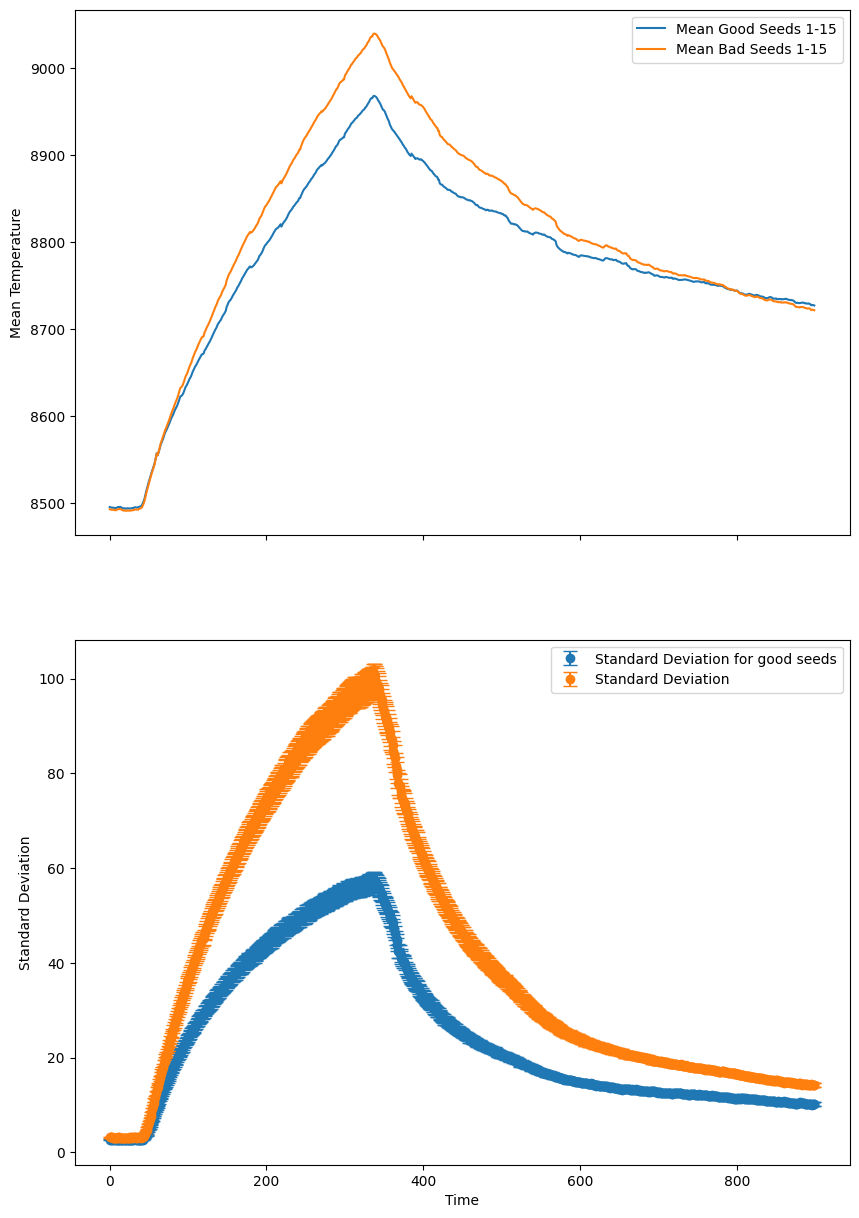

In [102]:
# Create subplots for the mean and standard deviation curves
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 15))

# Plot the mean curves for the first 5 seeds as a group
group1_mean = [seed_curve_mean[tag] for tag in list(seed_curve_mean.keys())[:15]]
ax1.plot(np.mean(group1_mean, axis=0), label='Mean Good Seeds 1-15')
group1_seeds_std = [seed_curve_std[tag] for tag in list(seed_curve_mean.keys())[:15]]
group1_seeds_stderr = [seed_curve_std[tag] / np.sqrt(len(seed_curve_std[tag])) for tag in list(seed_curve_mean.keys())[:15]]
ax2.errorbar(range(len(group1_seeds_std[0])), np.mean(group1_seeds_std, axis=0), yerr=np.mean(group1_seeds_stderr, axis=0), fmt='o', capsize=5, label='Standard Deviation for good seeds')

# Plot the mean curves for the last 5 seeds as a group
group2_mean = [seed_curve_mean[tag] for tag in list(seed_curve_mean.keys())[15:]]
ax1.plot(np.mean(group2_mean, axis=0), label='Mean Bad Seeds 1-15')
group2_seeds_std = [seed_curve_std[tag] for tag in list(seed_curve_mean.keys())[15:]]
group2_seeds_stderr = [seed_curve_std[tag] / np.sqrt(len(seed_curve_std[tag])) for tag in list(seed_curve_mean.keys())[15:]]
ax2.errorbar(range(len(group2_seeds_std[0])), np.mean(group2_seeds_std, axis=0), yerr=np.mean(group2_seeds_stderr, axis=0), fmt='o', capsize=5, label='Standard Deviation')

# Set the axis labels and legend
ax1.set_ylabel('Mean Temperature')
ax2.set_ylabel('Standard Deviation')
ax2.set_xlabel('Time')
ax1.legend()
ax2.legend()

# Show the plot
plt.show()


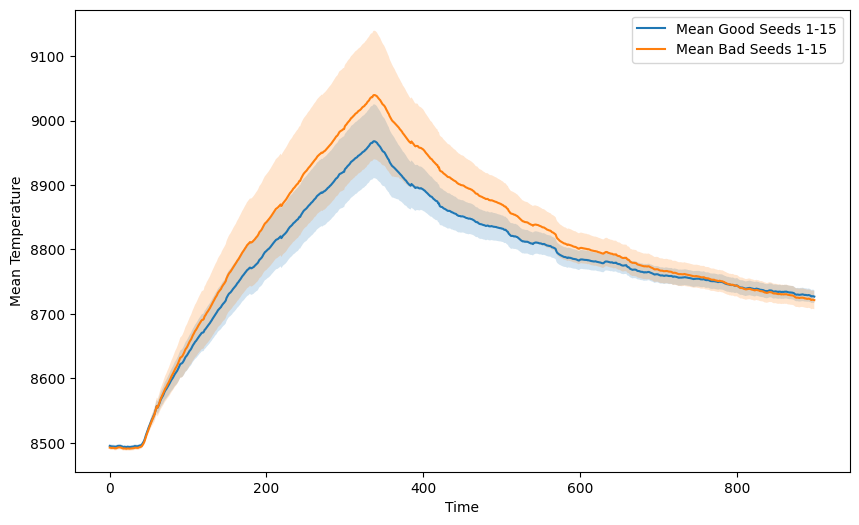

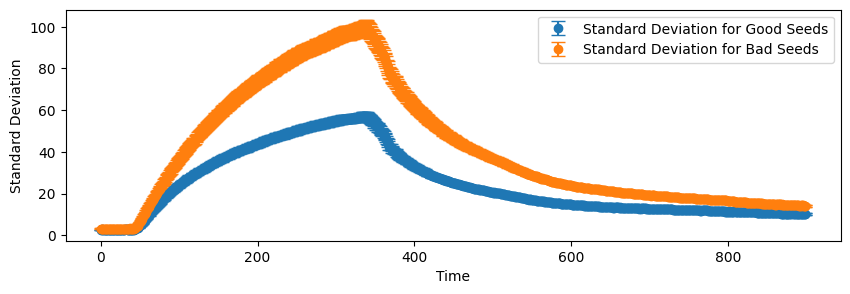

In [104]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean curves for the first 5 seeds as a group
group1_mean = [seed_curve_mean[tag] for tag in list(seed_curve_mean.keys())[:15]]
ax.plot(np.mean(group1_mean, axis=0), label='Mean Good Seeds 1-15')
group1_seeds_std = [seed_curve_std[tag] for tag in list(seed_curve_mean.keys())[:15]]
group1_seeds_stderr = [seed_curve_std[tag] / np.sqrt(len(seed_curve_std[tag])) for tag in list(seed_curve_mean.keys())[:15]]
ax.fill_between(range(len(group1_seeds_std[0])), np.mean(group1_mean, axis=0) - np.mean(group1_seeds_std, axis=0), np.mean(group1_mean, axis=0) + np.mean(group1_seeds_std, axis=0), alpha=0.2)

# Plot the mean curves for the last 5 seeds as a group
group2_mean = [seed_curve_mean[tag] for tag in list(seed_curve_mean.keys())[15:]]
ax.plot(np.mean(group2_mean, axis=0), label='Mean Bad Seeds 1-15')
group2_seeds_std = [seed_curve_std[tag] for tag in list(seed_curve_mean.keys())[15:]]
group2_seeds_stderr = [seed_curve_std[tag] / np.sqrt(len(seed_curve_std[tag])) for tag in list(seed_curve_mean.keys())[15:]]
ax.fill_between(range(len(group2_seeds_std[0])), np.mean(group2_mean, axis=0) - np.mean(group2_seeds_std, axis=0), np.mean(group2_mean, axis=0) + np.mean(group2_seeds_std, axis=0), alpha=0.2)

# Set the axis labels and legend
ax.set_ylabel('Mean Temperature')
ax.set_xlabel('Time')
ax.legend()

# Add the standard deviation as a separate error bar plot
fig, ax2 = plt.subplots(figsize=(10, 3))
ax2.errorbar(range(len(group1_seeds_std[0])), np.mean(group1_seeds_std, axis=0), yerr=np.mean(group1_seeds_stderr, axis=0), fmt='o', capsize=5, label='Standard Deviation for Good Seeds')
ax2.errorbar(range(len(group2_seeds_std[0])), np.mean(group2_seeds_std, axis=0), yerr=np.mean(group2_seeds_stderr, axis=0), fmt='o', capsize=5, label='Standard Deviation for Bad Seeds')
ax2.set_ylabel('Standard Deviation')
ax2.set_xlabel('Time')
ax2.legend()

# Show the plot
plt.show()


In [103]:
import csv

# Open a new file for writing
with open('./csv_data/15bad15good.csv', 'w', newline='') as csvfile:

    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Seed'] + list(range(900)))

    # Write the data rows
    for seed, curve in seed_curve_mean.items():
        writer.writerow([seed] + list(curve))
